In [33]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
from pandas import get_dummies
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold

In [34]:
data = pd.read_csv("./student/student-mat.csv", sep=';')


In [35]:
#choose 'Walc' as labels and encode them into one-hot
labels = data['Walc']
labels_with_dummies = pd.get_dummies(labels)
y = labels_with_dummies.astype('int').values


In [36]:
#use the whole dataframe(except 'Wals') as feature set (categorical features are also encoded into one-hot)
features = data.drop('Walc', axis=1)
features_with_dummies = pd.get_dummies(features.select_dtypes(include=['object']))
df_full = pd.concat([features, features_with_dummies], axis=1)

X = df_full.drop(features.select_dtypes(include=['object']), axis=1).astype('int').values


In [37]:
%%time
# Dataset splitting for cross-validation

kf = KFold(n_splits=4, random_state=None, shuffle=False)
#kf = GroupKFold(n_splits=2)
#groups = [x for x in range(0,395)]

# Learning on the splitted set
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_cv = [x for x in range(25,400,25)]
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]


for ntrees in trees_cv:
    # applying random forest algorithm with multioutput classification support (the method revealed 
    # greatest performance according to the original paper: 
    # https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf )
    rfc = RandomForestClassifier(n_estimators=ntrees, max_features=55, n_jobs=-1, oob_score=True, 
                                 max_depth=15, min_samples_leaf=1)
    multi_target_forest = MultiOutputClassifier(rfc, n_jobs=-1)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        multi_target_forest.fit(X_train, y_train)
        temp_train_acc.append(multi_target_forest.score(X_train, y_train))
        temp_test_acc.append(multi_target_forest.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)

#print(kf.get_n_splits(X))





CPU times: user 47.8 s, sys: 6.93 s, total: 54.7 s
Wall time: 2min 56s


Best accuracy on cross-validation is 29.35% with 350 trees


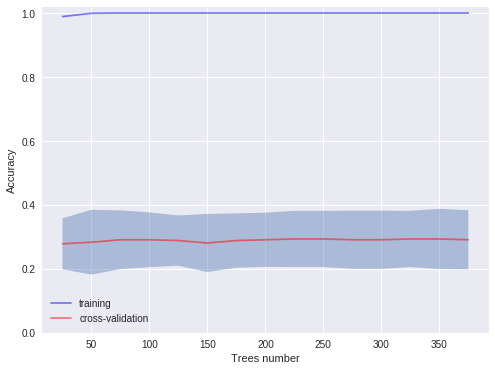

In [38]:
#Cross-validation plot tree_greed
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on cross-validation is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_cv[np.argmax(test_acc.mean(axis=1))]))
_, f = plt.subplots(figsize=(8, 6))
f.plot(trees_cv, train_acc.mean(axis=1), alpha=0.5, color='blue', label='training')
f.plot(trees_cv, test_acc.mean(axis=1), alpha=0.5, color='red', label='cross-validation')
f.fill_between(trees_cv, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), alpha=0.4)
f.legend()
f.set_ylim([0.0,1.02])
f.set_ylabel("Accuracy")
f.set_xlabel("Trees number");

Best accuracy on cross-validation is 61.78% with 375 trees


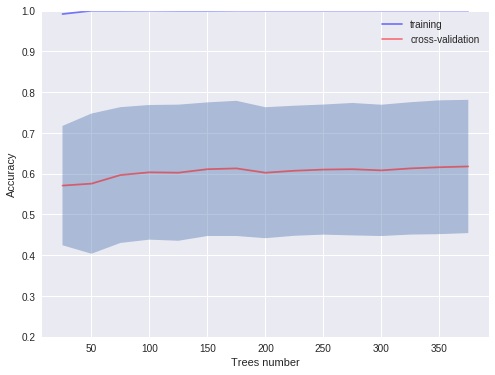

In [32]:
#add Portugal dataset
data1 = pd.read_csv("./student/student-mat.csv", sep=';')
data2 = pd.read_csv("./student/student-por.csv", sep=';')

frames = [data1, data2]
data_full = pd.concat(frames)


#choose 'Walc' as labels and encode them into one-hot
labels_new = data_full['Walc']
labels_new_with_dummies = pd.get_dummies(labels_new)
y1 = labels_new_with_dummies.astype('int').values

#use the whole dataframe(except 'Wals') as feature set (categorical features are also encoded into one-hot)
features_new = data_full.drop('Walc', axis=1)
features_new_with_dummies = pd.get_dummies(features_new.select_dtypes(include=['object']))
df_new_full = pd.concat([features_new, features_new_with_dummies], axis=1)

X1 = df_new_full.drop(features_new.select_dtypes(include=['object']), axis=1).astype('int').values

#%%time
# Dataset splitting for cross-validation

kf = KFold(n_splits=4, random_state=None, shuffle=False)
#kf = GroupKFold(n_splits=2)
#groups = [x for x in range(0,395)]

# Learning on the splitted set
train_acc1 = []
test_acc1 = []
temp_train_acc = []
temp_test_acc = []
trees_cv = [x for x in range(1,400,25)]
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
max_features_grid = [10, 20, 30, 40, 50]

#for max_features in max_features_grid:
for ntrees in trees_cv:
    # applying random forest algorithm with multioutput classification support (the method revealed 
    # greatest performance according to the original paper: 
    # https://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf )
    rfc = RandomForestClassifier(n_estimators=ntrees, max_features=55, n_jobs=-1, oob_score=True, 
                                 max_depth=15, min_samples_leaf=1)
    multi_target_forest = MultiOutputClassifier(rfc, n_jobs=-1)
    temp_train_acc = []
    temp_test_acc = []
    for train_index1, test_index1 in kf.split(X1, y1):
        X_train1, X_test1 = X1[train_index1], X1[test_index1]
        y_train1, y_test1 = y1[train_index1], y1[test_index1]
        multi_target_forest.fit(X_train1, y_train1)
        temp_train_acc.append(multi_target_forest.score(X_train1, y_train1))
        temp_test_acc.append(multi_target_forest.score(X_test1, y_test1))
    train_acc1.append(temp_train_acc)
    test_acc1.append(temp_test_acc)
    
#print(kf.get_n_splits(X))

#Cross-validation plot tree_greed
train_acc1, test_acc1 = np.asarray(train_acc1), np.asarray(test_acc1)
print("Best accuracy on cross-validation is {:.2f}% with {} trees".format(max(test_acc1.mean(axis=1))*100, 
                                                        trees_cv[np.argmax(test_acc1.mean(axis=1))]))
_, f = plt.subplots(figsize=(8, 6))
f.plot(trees_cv, train_acc1.mean(axis=1), alpha=0.5, color='blue', label='training')
f.plot(trees_cv, test_acc1.mean(axis=1), alpha=0.5, color='red', label='cross-validation')
f.fill_between(trees_cv, test_acc1.mean(axis=1) - test_acc1.std(axis=1), test_acc1.mean(axis=1) + test_acc1.std(axis=1), alpha=0.4)
f.legend()
f.set_ylim([0.2,1.0])
f.set_ylabel("Accuracy")
f.set_xlabel("Trees number");